#                                     Identifying Coding Languages:

### Imports:

In [2]:
import prepare as pr
import explore_final as e
import modeling as md

### Project Plan:

##### Acquire:
   - To Acquire the data we had to grab a github access token so that we could scrape their website using our new credentials.


   - We then grabbed the readme files out of 100 pages of repositories that were 'space' and were either using Python, Java, Javascript, or C#.


##### Prepare:
 - The readme's we acquired are filled with links and metadata text which is not going to be useful for our models so in order to clean it we had to:
    - Get rid of html and markdown links in the readme text using regex and beautiful soup.
    - Get rid of all metadata throughout the text using regex and beautiful soup.
    - Get rid of excess characters and filler words using lemmatize.



##### Explore:

##### Model:


##### Deliver:

### Project Summary:

### Acquisition and Prep:

In [4]:
#Acquires the cleaned data with our feature engineering included. still missing bag of words and ngrams.
df = pr.get_clean_df()

### Explore:

## How is the target variable represented in the sample? 

In [5]:
# table of the target variables count and perecentage of df 
e.data_representation(df)

,count,percent
JavaScript,153,0.35
Python,137,0.32
C#,93,0.22
Java,49,0.11


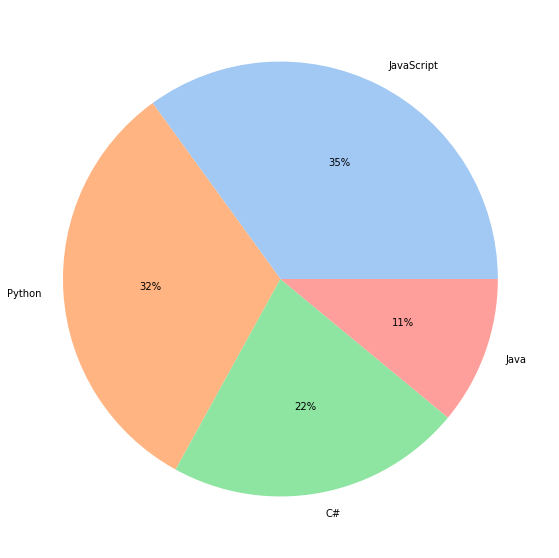

In [5]:
# visualization of target variable in data set 
e.pie(df)

### Takeaways 

- Javascript makes up 35% of the sample 
- Python makes up 31% of sample 
- Based on sample we might infer that these are very popular languges among users of github 

## What are the top words used in cleaned C#?

In [6]:
# top 10 words for c_sharp 
e.sort_by_language('c_sharp',e.cs_freq_clean,e.js_freq_clean, e.jv_freq_clean, e.py_freq_clean,e.all_freq_clean)

,c_sharp,javascript,java,python,all
&#9;,528,7,0,56,591
v,81,33,2,1,117
fix,78,1,0,2,81
fixed,72,82,1,2,157
parts,71,3,0,1,75
drag,50,1,0,0,51
ksp,48,0,0,0,48
part,46,5,0,2,53
stiffening,44,0,0,0,44
features,44,8,7,17,76


### Takeaways 
- &#9 is most recognized "word" in readme files that are coded in c#
- The words with the highest count in c # but lowest in all other languages are ksp and stiffening
- These words should be considered for modeling

## What are the most used words in cleaned python strings? 

In [7]:
# top 10 words for python
e.sort_by_language('python',e.cs_freq_clean,e.js_freq_clean, e.jv_freq_clean, e.py_freq_clean,e.all_freq_clean)

,c_sharp,javascript,java,python,all
python,0,1,1,84,86
&#9;,528,7,0,56,591
codeblock,0,0,0,51,51
subnet,0,0,0,45,45
image,0,3,0,45,48
install,8,17,1,43,69
project,22,20,10,41,93
data,10,9,9,40,68
code,24,21,7,35,87
using,16,18,1,31,66


### Takeaways 
- Python used infrequently in other readme files 
- Codeblock and subnet not used by other languages 
- Most used word is python 

## Are there difference between the clean and lemmatized C# bi grams?

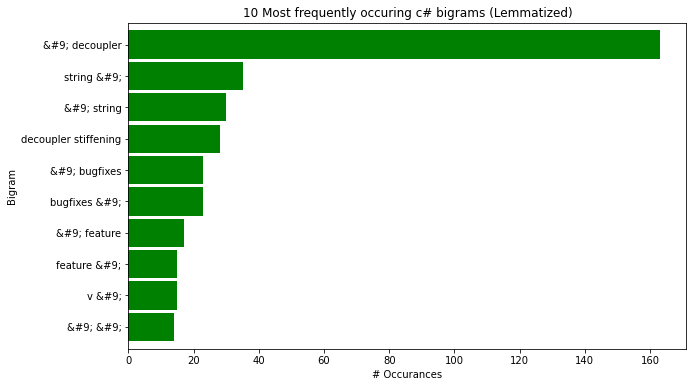

In [8]:
# 10 most commont bi grams for lemmatized c# strings
e.csharp_bigrams_lem(e.cs_lem)

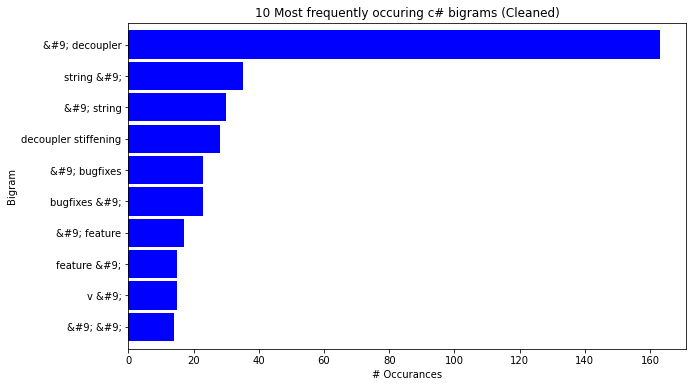

In [9]:
# 10 most commont bi grams for cleaned c# strings
e.csharp_bigrams_clean(e.cs_lem)

### Takeaways 
- Minimal difference between cleaned c# strings and lemmatized strings 
- Same pairings but slightly different order 
- &#9; decoupler should be considered for modeling


## Are there difference between the clean and lemmatized python bi grams?

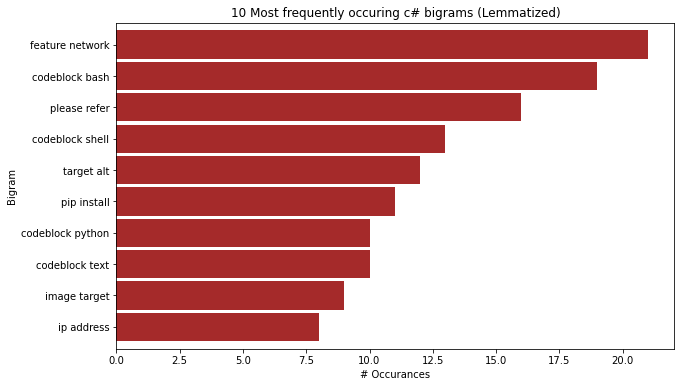

In [10]:
# 10 most commont bi grams for lemmatized python strings
e.python_bigram_lem(e.py_lem)

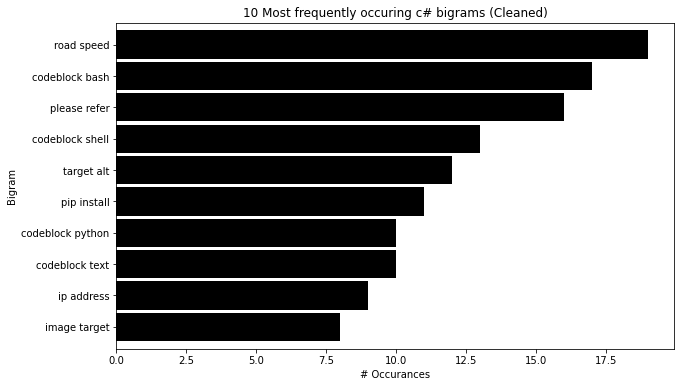

In [11]:
# top 10 most frequently occuring bi grams for cleaned python strings
e.python_bigrams_clean(e.py_clean)

### Takeaways 
- Slight difference between words in clean vs lemmatized version
- Image target and IP address at the bottom of both lists 
- Feature network most frequent pair in lemmatized version
- Road speed most frequent pair in cleaned 
- feature network and road speed should be considered for modeling

##  Is there an association between coding language and the lemmatized mean of string lengths across languages?

Hypothesis: 

**$H_o$: There is not a significant difference in the mean lemmatized string length of the languages.**<br>
**$H_a$: There is a significant difference in the mean lemmatized string length of the languages .**<br>

In [13]:
# results of statistical test
e.anova_test(e.js_lem_length, e.jv_lem_length,e.cs_lem_length,e.py_lem_length)

KruskalResult(statistic=1.5563404327437544, pvalue=0.6693293380228167)

### Takeaways 
- Statistical tests does not support significant difference in means of lemmatized string lengths
- This feature should not be considered for modeling

### Modeling:

To prepare the data set for modeling we:

- Lemmatized the cleaned text.
- Created the TFID vectorizer. 
- Using the vectorizer we created so called Bag of Words, that calculates how often the word appears in the text.
- Using the vectorizer we removed the words that appear in the text observations only once.
- Separated the target variable from the train, validate and test data sets.

##### Feature engineering:
We have built additional features that we decided to keep for modeling. 

|Feature name|Description|
|:------|:-------|
|<img width=150/>|<img width=450/>|
|*sentiment*| calculates compound sentiment score|
|*lem_length*|the length of the lemmatized text|
|*original_length*| the length of the original text|
|*length_diff*| the difference in the length between orginal text and clean un-lemmatized text|

All engineered features are numerical and they were scaled prior to modeling.

After preparation the text, we jumped into modeling. Our goal was to create the model, that possibly could identify the programming language of the repository based on the text from `ReadMe` files. Our models can predict four programming languages: `JavaScript`, `C#`, `Java` and `Python`.

**The models we created**

I used following classifiers (classification algorithms): 
- Decision Tree, 
- Random Forest, 
- Logistic Regression,
- Gaussian NB,
- Multinational NB, 
- Gradient Boosting, and
- XGBoost. 

For most of our models we have used `GridSearchCV` algorithm that picked the best feature combinations for our training set. The parameters that we've used you can see below.

In [16]:
# run all models and print the parameters that the grid search considered the best ones for our training set.
md.run_all_classifiers()

Best parameters per algorithm:
----------------------------------------------------
Decision Tree Parameters:  {'max_depth': 6}
Random Forest Parameters:  {'max_depth': 5, 'min_samples_leaf': 3}
Logistic Regression: default paramters
Gaussian NB parameters: default paramters
Multinomial NB Parameters:  {'alpha': 0.2}
Gradient Boosting Parameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150}
XGBoost Parameters:  {'gamma': 0.3, 'max_depth': 3}



**Model evaluation**

To evaluate the models we used the accuracy score. The good outcome is the one where the `accuracy score` is higher than our `baseline` - the propotion of the most popular programming language in our train data set. It is `JavaScript` and `0.35`

In [18]:
# show the baseline
md.baseline

0.35

You can see below how our models performed on train and validate data sets.

In [10]:
# show the accuracy scores of the traing and validation sets
md.display_scores()

,model_name,train_score,validate_score,score_difference
1,Random Forest,0.609959,0.451923,0.158035
0,Decision Tree,0.622407,0.461538,0.160868
4,Multinomail Naive Bayes,0.892116,0.586538,0.305578
2,Logistic Regression,0.867220,0.548077,0.319143
3,Gaussian Naive Bayes,0.879668,0.509615,0.370053
6,XGBoost,0.946058,0.519231,0.426827
5,Gradient Boosting,0.983402,0.490385,0.493018


We can see that all models are not consistent. The accuracy scores drop signiffically from the train to validate set. We decided to use the Random Forest classifier for our test set. This classifier didn't get the highest accuracy score on the validation set, but showed the lowest difference in the scores.

Here are the results that we have got on the test set:

### Test:

In [19]:
# run the classifier on the test set
md.run_best_model()

,result
Model name,Random Forest
Train score,0.62
Validate score,0.45
Test score,0.54


Random Forest Classifier gets the 0.54% accuracy score which is almost 20% higher than the baseline.

##### Modeling conclusions

While the accuracy score of our best model doesn't seem to be impressive, we are beating our baseline by 20%. On top of this we found that four most important features for the algorithms were `length_diff`, `lem_length`, `original_length` and `sentiment`. All those features we obtained through **_feature engineering_**.

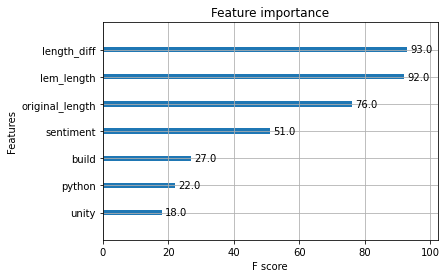

In [20]:
# display feature importance from xgboost classifier
md.display_feature_importance()

##### Modeling takeaways

- The best algorithm  is Random Forest Classifier with following parameters `{'max_depth': 5, 'min_samples_leaf': 3}`
- It predicts the programming language with 54% accuracy
- We did beat our baseline by 19%

### Conclusion:

### Reccomendations: